A Gentle into Gaussian Mixture Models (GMM) & Expectation–Maximization (EM) Algorithm  
-----
<br>
<center><img src="images/paranormal.jpg" width="700"/></center>

By The End Of This Session You Should Be Able To:
----

- Describe the Gaussian Distribution
- Explain how Gaussian Mixture Models (GMM) are a logical extension
- List the steps of the Expectation–Maximization (EM) algorithm
- Apply EM to find a GMM

Normal Distribution: A Pretty Picture
------
<center><img src="images/normal.png" width="700"/></center>

Normal Distribution: Features & Benefits
------

- Has mean & variance/standard deviation, ~$N(\mu, \sigma^2)$
- Function is well known
- Most of mass is in the middle
- Symmetrical
- Goes from -∞ to ∞

Normal Distribution: In Code
------


In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

sns.set_style("white")
%matplotlib inline

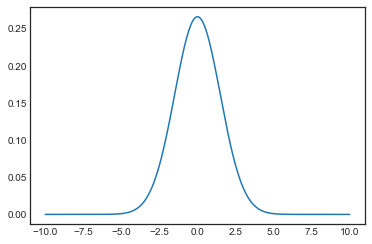

In [3]:
x = np.linspace(start=-10, stop=10, num=1000)
y = stats.norm.pdf(x, loc=0, scale=1.5) 
plt.plot(x, y);

Discussion: What are example of data you can model with a normal distribution?
-----

<br>
<details><summary>
Click here for the solution…
</summary>
- Physical quantities (height, weight, length, ...)  
- Test scores  
- Salary  
- Anything that is sum of many independent processes. This is the heart of the Central Limit Theorem (CLT).  
</details>

Not Everything is Normal
------

<center><img src="images/abnormal.png" width="700"/></center>

Sometimes You Have 2 Gaussians
-----

<center><img src="images/2_gaus.png" width="700"/></center>

DEMO!!!
----

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("bimodal_example.csv")
df.head(n=5)

,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995


In [6]:
data = df.x

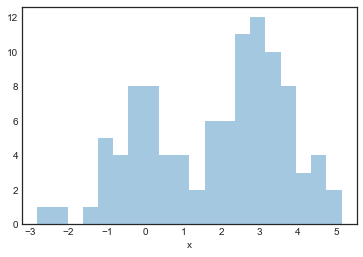

In [7]:
sns.distplot(data,
             bins=20,
             kde=False);

Is the normal distribution a useful model for the data?

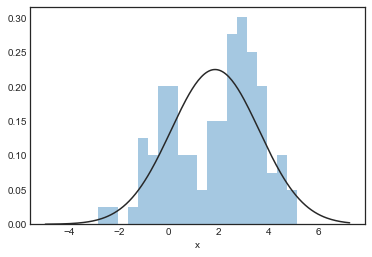

In [8]:
sns.distplot(data,
             fit=stats.norm,
             bins=20,
             kde=False,);

What model should we fit?
------

<br>
<details><summary>
Click here for a hint…
</summary>
X appears to be a mixture of two Normal distributions
</details>

<br>
<br> 
<br>

----
Define The Model
-----

Two Normal distributions $N(\mu_1, \sigma_1^2)$ and $N(\mu_2, \sigma_2^2)$. 

There are 5 paramaters: 4 of the them are Normal distributions and 1 more for the probability of choosing one of them.

Let $w$ be the probability that the data comes from the first Normal, the parameter in this model is $\theta = (w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2)$.

The probability density function (PDF) is:

$$f(x | \theta) = w \  f_1(x \ | \  \mu_1, \sigma_1^2) + (1 - w) \  f_2 (x  \ | \  \mu_2, \sigma_2^2) $$  

Fit The Model
-----

Expectation–Maximization (EM) Algorithm  
-----
<br>
<center><img src="http://www.wilsonmongwe.co.za/wp-content/uploads/2015/07/400px-EM.jpg" width="400"/></center>

What is Expectation–Maximization (EM) algorithm?
------

An iterative method for finding maximum likelihood (MLE) or maximum a posteriori (MAP) estimates of parameters in statistical models,when the model depends on unobserved latent variables

Expectation–Maximization (EM) Workflow
------
<br>
<center><img src="http://people.revoledu.com/kardi/tutorial/EM/images/EM_algorithm.png" width="500"/></center>

Alternates between performing:

- __Expectation (E)__ step: Given the current parameters of the model, estimate a probability distribution.

- __Maximization (M)__ step: Given the current data, estimate the parameters to update the model.

EM, more formally
-----

Alternates between performing:

- __Expectation (E)__ step: Using the current estimate for the parameters, create function for the expectation of the log-likelihood.  

- __Maximization (M)__ step: Computes parameters maximizing the expected log-likelihood found on the E step. 

The M parameter-estimates are then used to determine the distribution of the latent variables in the next E step.

[Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)

EM example: 🐥 & 🐣
------

<center><img src="images/green.png" width="500"/></center>

We have a circular problem ∞...

If only we knew the cluster centroids, we could assign the data points to the closest clusters.   
If only we knew which clusters the data points belong to, we could compute their centroids.  

How do we assign points-to-clusters and clusters-to-points?

Here is how we gonna solve it:
-----

1. We start by randomly placing cluster centroids.

2. Then, we assign each data point to a cluster based on minimum distance.

3. Then, we compute the centers of those new clusters and move the centroids to that position.

4. Repeat step 2-3 until we get bored (or the centroids stop moving around).

Check for understanding
-----

How is problem generally solved?

<center><img src="https://cdn.meme.am/cache/instances/folder852/75679852.jpg" width="400"/></center>

__k-means__, aka the kind of clustering you should always do first.

<center><img src="images/e_1.png" height="500"/></center>

<center><img src="images/m_1.png" height="500"/></center>

What do we do next?

<center><img src="images/kmeans.png" width="500"/></center>

Source p435 of Pattern Recognition and Machine Learning by Bishop

A kinder, _softer_ k-means
-----

A “soft" version of $k$-means. 

Instead of assigning each point to just one cluster (hard clustering), EM will attach a probability to the membership of a point in each cluster - P(cluster|point). 

A data point can thus belong to several clusters (though with different probabilities).

<center><img src="https://cdn.meme.am/instances/250x250/63984114.jpg" width="500"/></center>

EM is trying to maximize the following function:
------
    
<center><img src="images/em_form.png" width="500"/></center>

- X is directly observed variable
- θ parameters of model
- Z is not directly observed / latent variable
    - Z is a joint (related) distribution on x.

Check for understanding
------

When do stop alternating between E & M?

<br>
<details><summary>
Click here for the solution…
</summary>
- Convergence (no _significant_ improvement)  
- We hit a priori stopping criteria  
- We run out of budget (time or money)  
</details>

EM Steps
-----

1. Initialize the parameters θ
2. Compute the best values for Z given θ  
3. Use the computed values of Z to compute a better estimate for the θ  
4. Iterate steps 2 and 3 until convergence

EM steps, stated another way
-----

1. Initialize the parameters of the models, either randomly or doing a "smart seeding"

2. E Step: Find the posterior probabilities of the latent variable given current parameter values.

3. M Step: Reestimate the parameter values given the current posterior probabilities.

4. Repeat 2-3 monitoring the likelihood function likelihood. Hope for convergence.

Check for understanding
------

What are the Z random variables in K-means?

<center><img src="images/e_1.png" height="500"/></center>

<br>
<details><summary>
Click here for the solution…
</summary>
The centers of the clusters. <br>
<br>
The centers of the clusters are new / missing / latent variables.
</details>

Back to our data
-----



In [9]:
class Gaussian:
    "Model univariate Gaussian"

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [10]:
best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 1.9, σ = 1.8


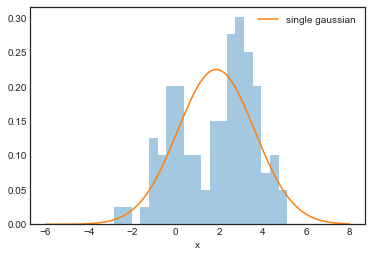

In [11]:
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

In [12]:
from math import sqrt, log, exp, pi
from random import uniform

In [13]:
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den
            wp2 /= den
            # add into loglike
            self.loglike += log(wp1 + wp2)
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)
        # compute new means
        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(rigt, data))
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep())
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

HT: https://gist.github.com/kylebgorman/2992206

In [14]:
# Check out the fitting process
n_iterations = 5
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    try:
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass

 1 Mixture: Gaussian(-2.8228, 0.00763578), Gaussian(1.90596, 1.72007), mix=0.00912)
 1 Mixture: Gaussian(-2.82288,  0.0), Gaussian(1.90966, 1.71565), mix=0.00989)


/Users/brianspiering/anaconda3/envs/gmm/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [15]:
# Find best Mixture Gaussian model
n_iterations = 20
n_random_restarts = 500
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
print('Done. 🙂')

Computing best model with random restarts...



/Users/brianspiering/anaconda3/envs/gmm/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Done. 🙂


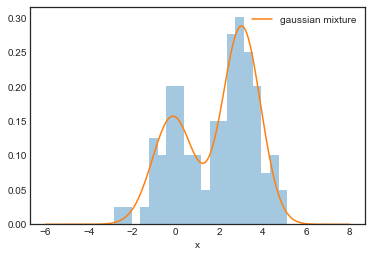

In [16]:
sns.distplot(data, bins=20, kde=False, norm_hist=True)
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
plt.legend();

GMM extensions: Beyond 2 Gaussians
-----

<center><img src="images/triples.jpg" width="700"/></center>

GMM extensions: Beyond 1 dimension
-----

<center><img src="images/em_2d_gmm.png" width="700"/></center>

Beyond GMM: Kernel Density Estimation (KDE)
-----

A non-parametric way to estimate the probability density function of a random variable.

We assume samples are drawn from some distribution with an unknown density ƒ.

Try to estimate with:
<center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/15255412d35488194b7e24e4518765e0af9992b5" width="700"/></center>

The only parameter is h the "bandwidth".

It is non-parameter because the number of parameters does not increase with model complexity.

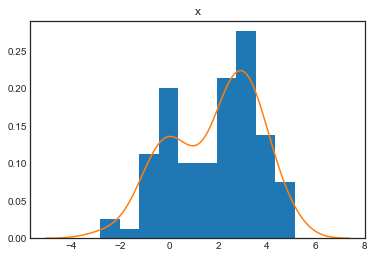

In [17]:
# Our data
df.hist(grid=False,
        normed=True);
sns.kdeplot(data,
           legend=False);

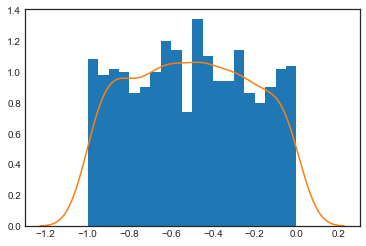

In [18]:
# Model an uniform without any priors
s = np.random.uniform(low=-1,
                      high=0,
                      size=1000)
plt.hist(s, bins=20, normed=True)
sns.kdeplot(s,
           legend=False);

Summary
----

- Gaussian Mixture Models (GMM) take our old friend the Gaussian and add another Gaussian(s).
- This allows us to model more complex data.
- We fit a GMM with the Expectation–Maximization (EM) Algorithm.
- Expectation–Maximization (EM) Algorithm is a series of steps to find good parameter estimates when there are latent variables.
- EM steps:
    1. Initialize the parameter estimates
    2. Given the current parameter estimates, find the min log likelihood for Z (data+latent variables)
    3. Given the current data, find better parameter estimates
    3. Repeat steps 2 & 3
- EM can be used beyond GMM
- GMM work well but you have to guess the number of Gaussians. Kernel Density Estimation (KDE) does __not__ require that kind of guessing 

Going Further...
----

- [mathematicalmonk's video series on the subject](https://www.youtube.com/playlist?list=PLD0F06AA0D2E8FFBA)
- [EM Demystified- An Expectation-Maximization Tutorial](https://www2.ee.washington.edu/techsite/papers/documents/UWEETR-2010-0002.pdf)
- [scikit-learn's implementation of GMM](http://scikit-learn.org/stable/modules/mixture.html) 

<br>
<br> 
<br>

----